In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition
import seaborn as sns

data = np.load('MLProject2024/fashion_train.npy')

print("Shape of the data:", data.shape)

images = data[:, :-1] 
labels = data[:, -1]  


print("Shape of images:", images.shape)
data[:10]
labels

Shape of the data: (10000, 785)
Shape of images: (10000, 784)


array([0, 1, 0, ..., 3, 0, 1], dtype=uint8)

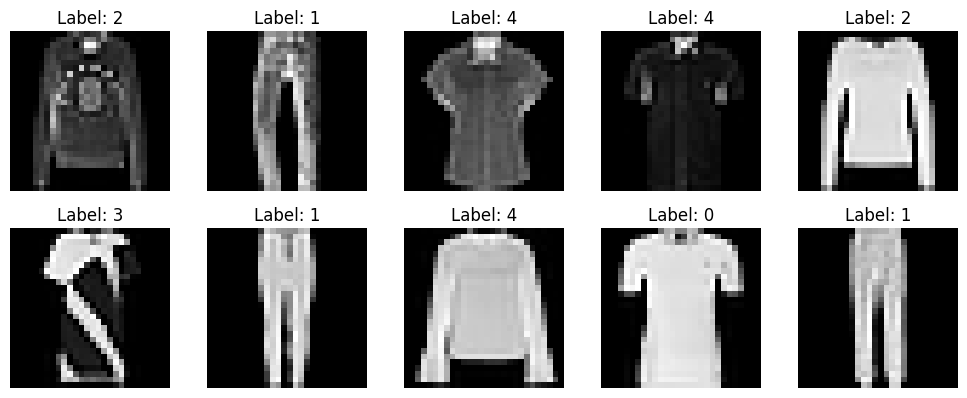

In [3]:
def plot_sample_images(images, labels, num_samples=10):
    random_indices = np.random.choice(images.shape[0], num_samples, replace=False) 

    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(5, 5, i + 1)  
        plt.imshow(images[random_indices[i]].reshape(28, 28), cmap='gray')  
        plt.title(f'Label: {labels[random_indices[i]]}') 
        plt.axis('off')
    plt.tight_layout()
    plt.show()


plot_sample_images(images, labels)

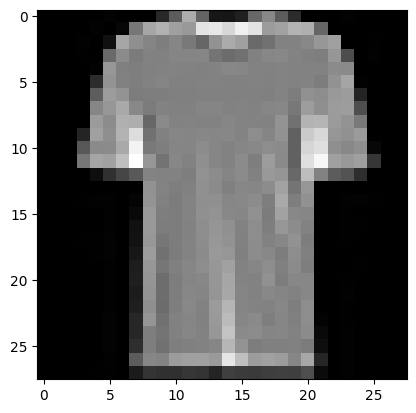

In [4]:
curr_img = np.reshape(data[0][:-1], (28,28))
plt.imshow(curr_img, cmap=plt.cm.gray);

In [5]:
train_df = pd.DataFrame(data)
class_mapping = {0:'Top',1:'Trouser',2:'Pullover',3:'Dress',4:'Shirt'}
train_df.iloc[:,-1].replace(class_mapping, inplace=True)

C:\Users\Mykyta\AppData\Local\Temp\ipykernel_70256\1167889196.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.iloc[:,-1].replace(class_mapping, inplace=True)


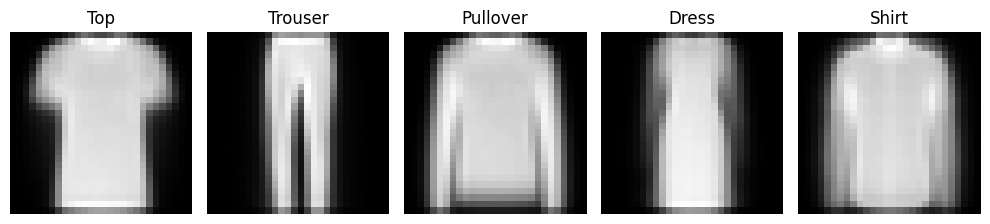

In [6]:
mean_images = []
for label in range(5):
    mean_image = np.mean(images[labels == label], axis=0).reshape(28, 28)
    mean_images.append(mean_image)

plt.figure(figsize=(10, 8))
for i, mean_image in enumerate(mean_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(class_mapping[i])
    plt.axis('off') 
plt.tight_layout()
plt.show()

In [7]:
mean = np.mean(data)
median = np.median(data)
minn = np.min(data)
maxx = np.max(data)
std = np.std(data)
print(f"{mean}, {median}, {minn}, {maxx}, {std}")

76.93116420382165, 14.0, 0, 255, 89.97942562765583


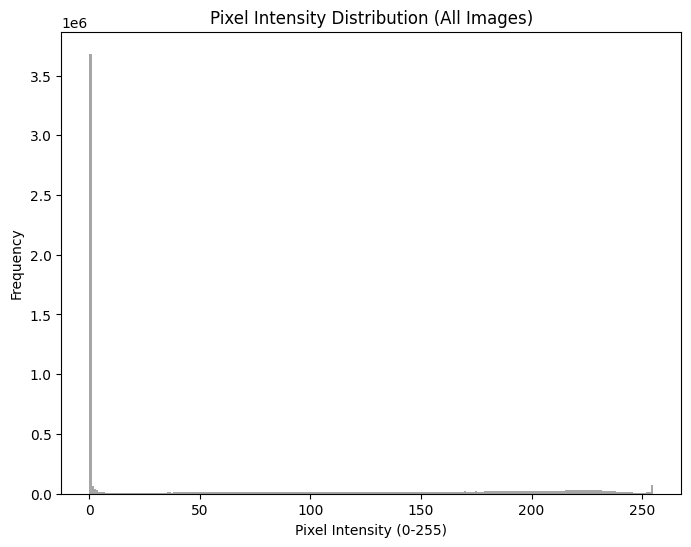

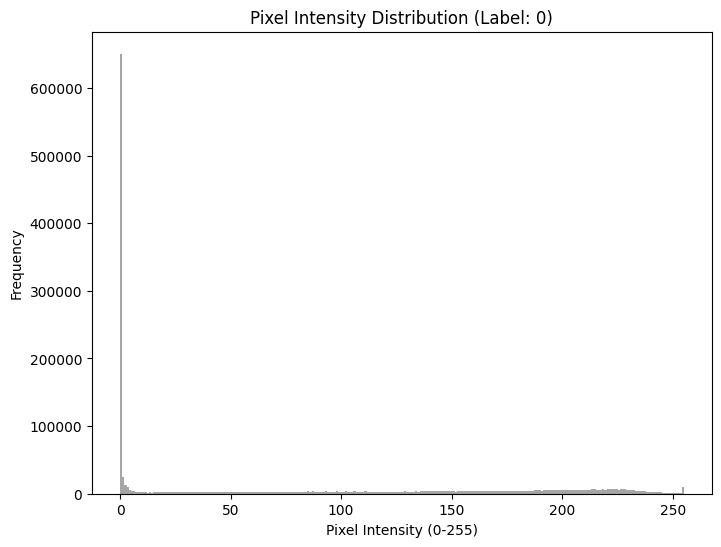

In [8]:
def plot_intensity_histogram(images, labels=None, label=None, bins=256):
    if label is not None:
        images = images[labels == label]
    
    all_pixels = images.flatten()

    plt.figure(figsize=(8, 6))
    plt.hist(all_pixels, bins=bins, color='gray', alpha=0.7)
    plt.title(f'Pixel Intensity Distribution (Label: {label})' if label is not None else 'Pixel Intensity Distribution (All Images)')
    plt.xlabel('Pixel Intensity (0-255)')
    plt.ylabel('Frequency')
    plt.show()

plot_intensity_histogram(images)

plot_intensity_histogram(images, labels=labels, label=0)

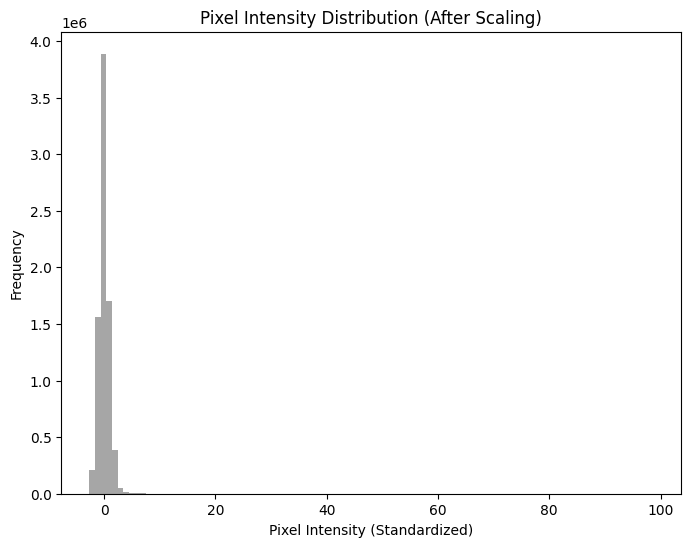

In [9]:
x = train_df.loc[:, :783].values
x = preprocessing.StandardScaler().fit_transform(x)
x.shape

flattened_scaled_pixels = x.flatten()

plt.figure(figsize=(8, 6))
plt.hist(flattened_scaled_pixels, bins=100, color='gray', alpha=0.7)
plt.title('Pixel Intensity Distribution (After Scaling)')
plt.xlabel('Pixel Intensity (Standardized)')
plt.ylabel('Frequency')
plt.show()

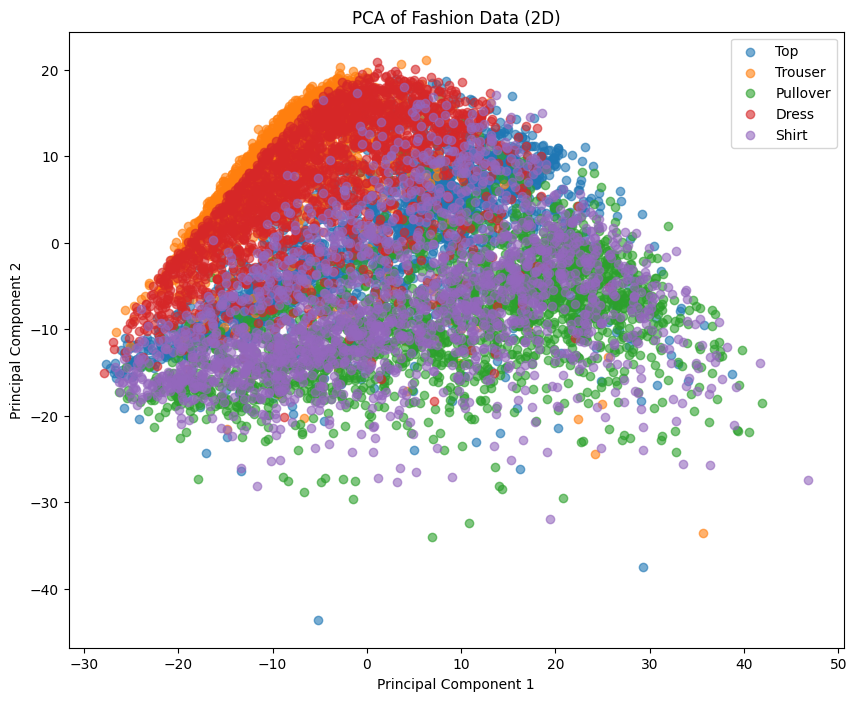

In [10]:
pca = decomposition.PCA()
pca_train = pca.fit_transform(x)

plt.figure(figsize=(10, 8))

for label in np.unique(labels):
    plt.scatter(pca_train[labels == label, 0], pca_train[labels == label, 1], 
                label=class_mapping[label], alpha=0.6)

plt.title('PCA of Fashion Data (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [11]:
print(pca.components_[:10])

[[ 5.82637305e-04  2.30631247e-03  2.34926124e-03 ...  1.33195002e-02
   5.81313508e-03  1.05615622e-03]
 [-9.84719199e-05 -2.29457213e-03 -5.69148192e-03 ... -2.04898046e-02
  -1.15426244e-02 -5.48839695e-03]
 [ 2.67124552e-03  1.05684466e-02  2.12765921e-02 ...  1.50343917e-03
   8.26990505e-03  6.90042583e-03]
 ...
 [-1.16550288e-02 -1.50928886e-02 -7.27539697e-02 ... -4.06647203e-02
  -4.09376326e-02 -3.89489033e-02]
 [ 9.23812166e-03  1.55193410e-03  3.31504832e-02 ...  7.72038486e-03
  -1.42891657e-02 -6.12657394e-03]
 [ 3.23172510e-02  2.92877030e-02  8.44633990e-02 ... -2.67592412e-02
  -1.26700156e-03  3.89846291e-02]]


In [12]:
print(sum(pca.explained_variance_ratio_[:110]))
print(pca.explained_variance_ratio_[:110])

0.8990856336050689
[0.22645698 0.13673557 0.06381166 0.05046707 0.03064291 0.02924805
 0.02197067 0.01880203 0.0147053  0.01416444 0.01298674 0.01232636
 0.01005118 0.00914286 0.00886118 0.00844979 0.00800824 0.0074046
 0.0071842  0.00678097 0.00637763 0.00625898 0.0059261  0.00557587
 0.00524909 0.00501018 0.00489192 0.0047749  0.00451686 0.00424941
 0.00419099 0.00403955 0.00393599 0.00388444 0.00379559 0.00362945
 0.00357774 0.00351894 0.00333661 0.00324689 0.00315796 0.00312242
 0.00298242 0.00291243 0.00277144 0.00273708 0.0026438  0.00258013
 0.00245687 0.00243532 0.002335   0.00228124 0.0022166  0.00216888
 0.00211117 0.00205265 0.0020176  0.00196418 0.0019223  0.00186012
 0.00181671 0.00179017 0.00176835 0.00172591 0.00167618 0.00165702
 0.00162515 0.00159048 0.00158136 0.00152019 0.00149526 0.00147891
 0.00146017 0.00144748 0.00142196 0.00141197 0.00139531 0.00136788
 0.00134884 0.00131928 0.00129775 0.00127872 0.00125089 0.00124339
 0.00121723 0.00119065 0.00115931 0.0011546 

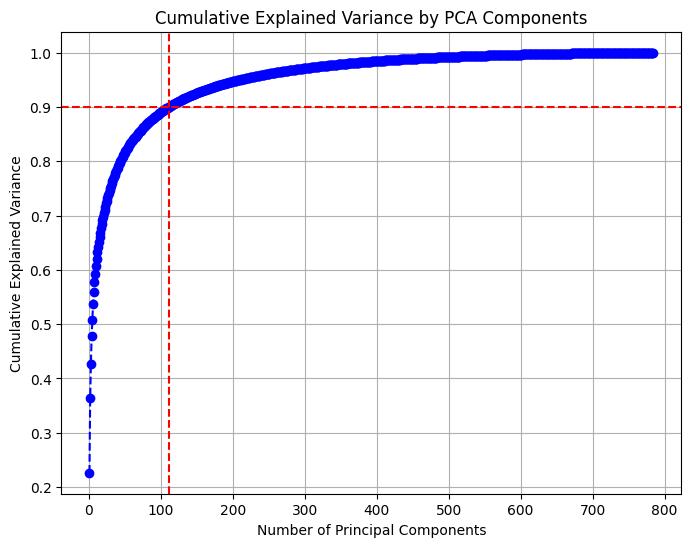

In [13]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')

plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--')  
plt.axvline(x=np.argmax(cumulative_explained_variance >= 0.90) + 1, color='r', linestyle='--') 

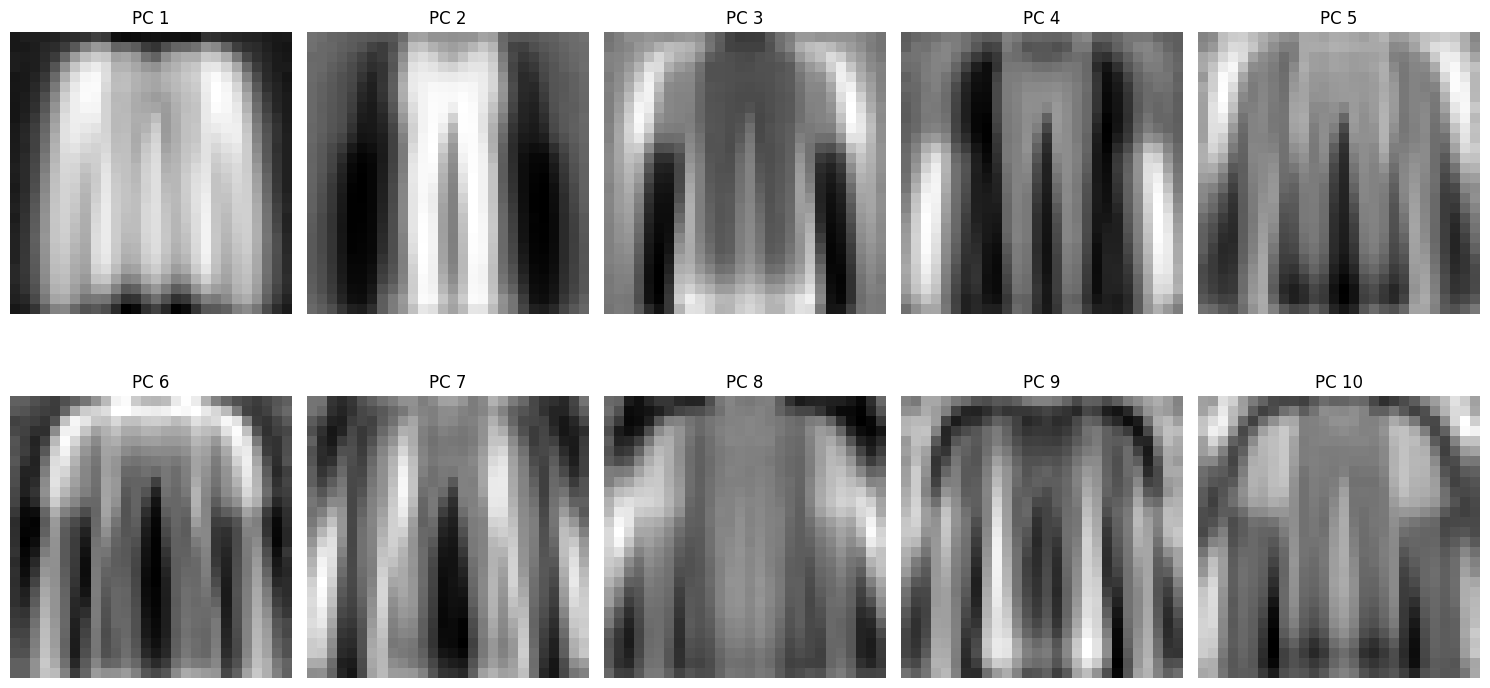

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    plt.title(f'PC {i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


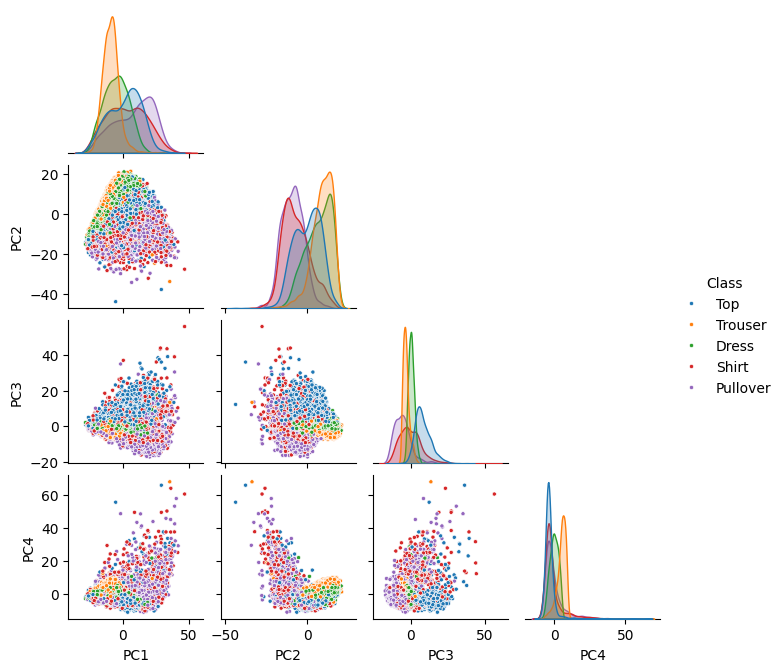

In [15]:
pc_labels = ['PC' + str(a) for a in range(1, len(pca_train[0])+1)]
pca_df = pd.DataFrame(pca_train, columns = pc_labels)

y = train_df.iloc[:,-1]

pca_4 = pca_df.copy()
pca_4 = pca_4[['PC1','PC2','PC3','PC4']]
pca_4['Class'] = y.reset_index(drop=True) 

sns.pairplot(data=pca_4,hue='Class',corner=True, markers = '.',height=1.7)
plt.show()

In [16]:
#functions for decision tree
# -gini group 
# -gini split
# -split
# -best split
# -decision tree
#

# gini = 1- sum(p)
#p=p0**2+p1**2+p2**2+p3**2+p4**2+p5**2 
#p0 = n0/n
#p1 = n1/n
#p2 = n2/n
#p3 = n3/n
#p4 = n4/n
#p5 = n5/n
#n0 = number of samples in class 0
#n1 = number of samples in class 1
#n2 = number of samples in class 2
#n3 = number of samples in class 3
#n4 = number of samples in class 4
#n = total number of samples in the group

def gini_group(dataset):
    '''takes one group of data and calculates the gini impurity of that'''
    
    counts=np.bincount(labels) #count the number of samples in each class
    n0, n1, n2, n3, n4 = counts 
    n = n0+n1+n2+n3+n4 
    if n == 0: #if the group is empty, gini impurity is 0
        return 0
    p0 = n0/n
    p1 = n1/n
    p2 = n2/n
    p3 = n3/n
    p4 = n4/n
    
    p = p0**2+p1**2+p2**2+p3**2+p4**2
    gini = 1- p
    return gini

def gini_split(left, right):
    '''takes two groups of data and calculates the gini impurity of the split'''
    print ('calculating gini split')
    n_left=len(left)
    n_right=len(right)
    n_total=n_left+n_right
    if n_total == 0: 
        return 0
    gini_split=n_left/n_total*gini_group(left)+n_right/n_total*gini_group(right)
    return gini_split
    
def split (dataset, column, value):
    '''takes a dataset, a column and a value and splits the dataset 
    into two groups based on the value(threshold) of the column, 
    returns two groups'''
    left = []
    right = []
    for row in dataset:
        if row[column] < value:
            left.append(row)
        else:
            right.append(row)
    return np.array(left), np.array(right)
    

def best_split(data):
    '''Finds the best split for the dataset and returns the split details.'''
    print ("looking for best split")
    best_gini = 1
    best_column = None
    best_value = None
    best_left = None
    best_right = None

    for column in range(data.shape[1] - 1):  # Exclude label column
        unique_values = np.unique(data[:, column])  # Unique values for potential split points
        for value in unique_values:
            left, right = split(data, column, value)
            gini = gini_split(left, right)
            if gini < best_gini:
                best_gini = gini
                best_column = column
                best_value = value
                best_left = left
                best_right = right

    return best_left, best_right, best_column, best_value, best_gini




In [17]:
def majority_class(data):
    '''Finds the majority class in the group and returns the class'''
    print("maj class calculation")
    return np.argmax(np.bincount(data[:, -1]))

In [18]:
def build_tree(data, max_depth, depth=0):
    '''builds tree recursively'''
    left, right, best_column, best_value, gini = best_split(data)
    
    if depth==max_depth or len(left)==0 or len(right)==0:
        return majority_class(data)

    subtree = {
                'feature': best_column,
                'value': best_value,
                'left': build_tree(left, max_depth, depth + 1), #recursive call
                'right': build_tree(right, max_depth, depth + 1) #recursive call
            }
    return subtree    


In [19]:
def predict(tree, sample):
    '''predicts the class of a sample based on the tree'''
    
    

In [20]:
from sklearn import decomposition, tree
from sklearn.metrics import accuracy_score
import numpy as np

train_data = np.load('MLProject2024/fashion_train.npy')

print("Shape of the train data:", train_data.shape)
train_images = train_data[:, :-1] 
train_labels = train_data[:, -1]  

test_data = np.load('MLProject2024/fashion_test.npy')

print("Shape of the test data:", test_data.shape)

test_images = test_data[:, :-1] 
test_labels = test_data[:, -1]

pca = decomposition.PCA(300)
pca_train = pca.fit_transform(train_images)
pca_test = pca.transform(test_images)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(pca_train, train_labels)

Shape of the train data: (10000, 785)
Shape of the test data: (5000, 785)


In [21]:
pca_train = pca.fit_transform(train_images)
pca_test = pca.transform(test_images)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(pca_train, train_labels)
y_pred=clf.predict(pca_test)
accuracy = accuracy_score(test_labels, y_pred)
print(accuracy)

0.7286


In [22]:
accuracyDict = {}
for i in range(1,60):
    pca = decomposition.PCA(i)
    pca_train = pca.fit_transform(train_images)
    pca_test = pca.transform(test_images)
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(pca_train, train_labels)
    y_pred=clf.predict(pca_test)
    accuracy = accuracy_score(test_labels, y_pred)
    accuracyDict[i] = accuracy

In [23]:
accuracyDict

{1: 0.3062,
 2: 0.5008,
 3: 0.6172,
 4: 0.672,
 5: 0.6952,
 6: 0.7092,
 7: 0.7136,
 8: 0.7374,
 9: 0.7482,
 10: 0.7526,
 11: 0.7474,
 12: 0.7504,
 13: 0.7488,
 14: 0.7466,
 15: 0.7556,
 16: 0.7528,
 17: 0.751,
 18: 0.7476,
 19: 0.7496,
 20: 0.7506,
 21: 0.7482,
 22: 0.7408,
 23: 0.7396,
 24: 0.7436,
 25: 0.743,
 26: 0.744,
 27: 0.747,
 28: 0.7396,
 29: 0.7404,
 30: 0.745,
 31: 0.7452,
 32: 0.7426,
 33: 0.7418,
 34: 0.7412,
 35: 0.742,
 36: 0.746,
 37: 0.7432,
 38: 0.7468,
 39: 0.7428,
 40: 0.7494,
 41: 0.7494,
 42: 0.751,
 43: 0.7522,
 44: 0.7436,
 45: 0.746,
 46: 0.7454,
 47: 0.7476,
 48: 0.7536,
 49: 0.7508,
 50: 0.7492,
 51: 0.7492,
 52: 0.7478,
 53: 0.7492,
 54: 0.7476,
 55: 0.749,
 56: 0.752,
 57: 0.7484,
 58: 0.7506,
 59: 0.7452}

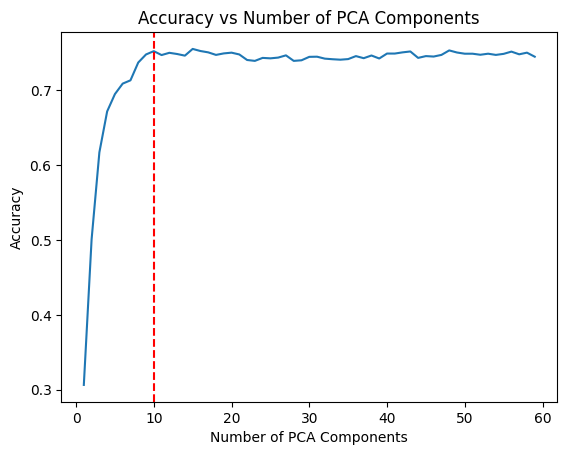

In [26]:
#plotting the accuracy
import matplotlib.pyplot as plt
plt.plot(list(accuracyDict.keys()), list(accuracyDict.values()))
plt.xlabel('Number of PCA Components');
plt.ylabel('Accuracy');
plt.title('Accuracy vs Number of PCA Components');
#vertical line at 10
plt.axvline(x=10, color='r', linestyle='--')

In [ ]:
accuracyDict = {}
for i in range(1,60):
    pca = decomposition.PCA(i)
    pca_train = pca.fit_transform(train_images)
    pca_test = pca.transform(test_images)
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(pca_train, train_labels)
    y_pred=clf.predict(pca_test)
    accuracy = accuracy_score(test_labels, y_pred)
    accuracyDict[i] = accuracy
    


In [27]:
accuracyDictDepth = {}
for i in range(5,100):
    pca = decomposition.PCA(10)
    pca_train = pca.fit_transform(train_images)
    pca_test = pca.transform(test_images)
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(pca_train, train_labels)
    y_pred=clf.predict(pca_test)
    accuracy = accuracy_score(test_labels, y_pred)
    accuracyDictDepth[i] = accuracy
    


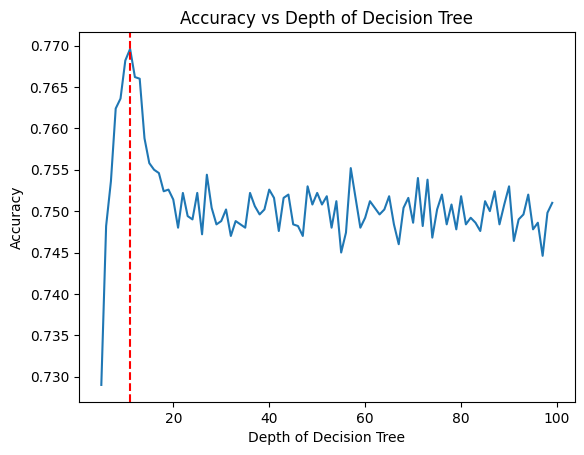

In [ ]:
#plotting the accuracy with depth
import matplotlib.pyplot as plt
plt.plot(list(accuracyDictDepth.keys()), list(accuracyDictDepth.values()))
plt.xlabel('Depth of Decision Tree');
plt.ylabel('Accuracy');
plt.title('Accuracy vs Depth of Decision Tree');
#vertical line at 11
plt.axvline(x=11, color='r', linestyle='--')

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

pipeline = Pipeline([
    ('pca', PCA()),
    ('dt', DecisionTreeClassifier(random_state=99))
])

param_grid = {
    'pca__n_components': list(range(7, 30)),  # Adjust steps as needed
    'dt__max_depth': list(range(5, 40))
}


grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1  # Set to 0 to reduce verbosity
)

# Fit the model
grid_search.fit(train_images, train_labels)

# Extract mean test scores
results = grid_search.cv_results_

# Convert to a dictionary with (n_components, max_depth) as keys
accuracyDictPCAandDepth = {}
for mean, params in zip(results['mean_test_score'], results['params']):
    key = (params['pca__n_components'], params['dt__max_depth'])
    accuracyDictPCAandDepth[key] = mean

# Example: Find the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Plotting the results
import pandas as pd
import seaborn as sns

# Convert the parameter grid to a DataFrame for easier plotting
param_df = pd.DataFrame(results['params'])
param_df['mean_accuracy'] = results['mean_test_score']

#for random state=42
#Fitting 5 folds for each of 805 candidates, totalling 4025 fits
#Best Parameters: {'dt__max_depth': 10, 'pca__n_components': 16}
#Best Cross-Validation Accuracy: 0.7735


Fitting 5 folds for each of 805 candidates, totalling 4025 fits
Best Parameters: {'dt__max_depth': 9, 'pca__n_components': 27}
Best Cross-Validation Accuracy: 0.7749


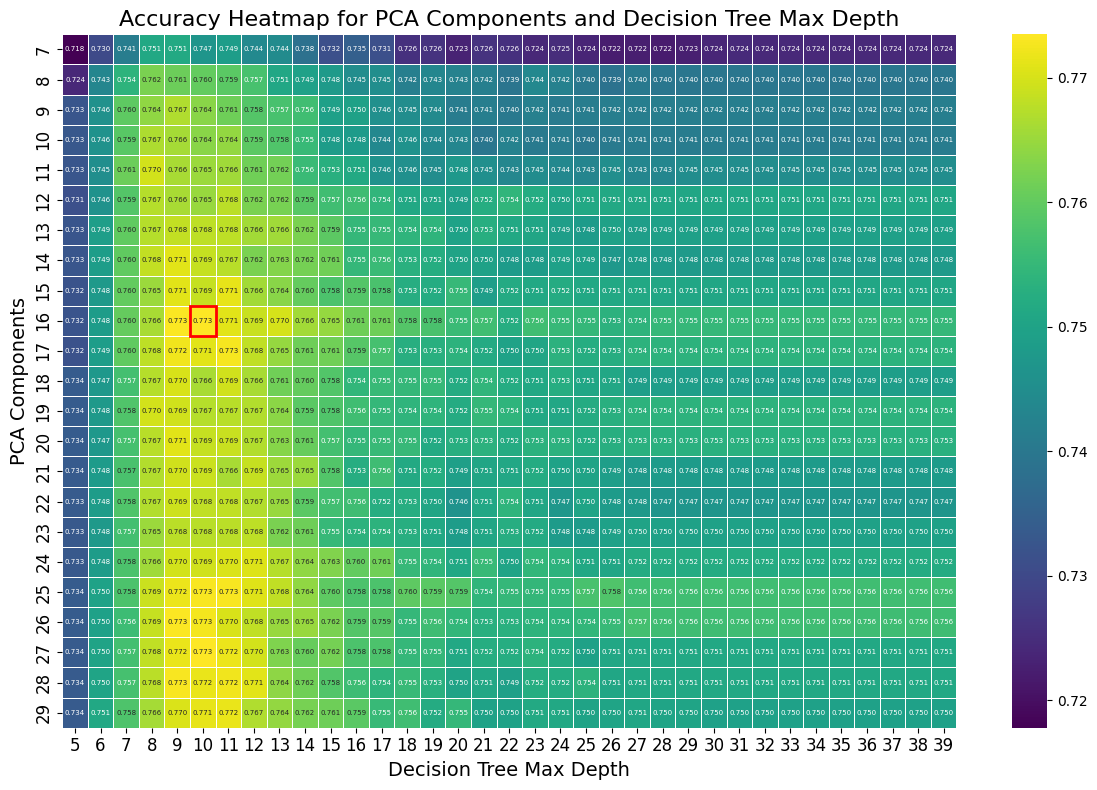

In [42]:
import matplotlib.patches as patches

heatmap_data = param_df.pivot(index="pca__n_components", columns="dt__max_depth", values="mean_accuracy")

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap and capture the Axes object
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="viridis",
    annot_kws={"size": 5},          # Font size for annotations inside cells
    linewidths=.5                    # Line width between cells
)

# Define the specific PCA component and max_depth to highlight
target_pca = 16
target_depth = 10

# Check if the target values exist in the heatmap data
if target_pca in heatmap_data.index and target_depth in heatmap_data.columns:
    # Get the position (row and column indices) of the target cell
    row_idx = heatmap_data.index.get_loc(target_pca)
    col_idx = heatmap_data.columns.get_loc(target_depth)
    
    # Create a Rectangle patch: (x, y), width, height
    rect = patches.Rectangle(
        (col_idx, row_idx),      # (x, y) position
        1,                        # Width of the rectangle
        1,                        # Height of the rectangle
        fill=False,               # No fill
        edgecolor='red',          # Border color
        linewidth=2               # Border thickness
    )
    
    # Add the rectangle to the Axes
    ax.add_patch(rect)
    
    # Optionally, add a label to the highlighted cell

else:
    print(f"Specified PCA component ({target_pca}) or max_depth ({target_depth}) not found in the heatmap data.")

# Set the title and labels with adjusted font sizes
plt.title(
    "Accuracy Heatmap for PCA Components and Decision Tree Max Depth",
    fontsize=16
)
plt.xlabel(
    "Decision Tree Max Depth",
    fontsize=14
)
plt.ylabel(
    "PCA Components",
    fontsize=14
)

# Adjust tick label font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Optimize layout
plt.tight_layout()

# Display the heatmap
plt.show()

In [25]:
images = train_data[:, :-1] 
labels = train_data[:, -1]  
build_tree(pca_train, 2)

looking for best split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating gini split
calculating

KeyboardInterrupt: 

In [1]:
# Decision tree: 

print(classification_report(test_labels, dt_predictions))

print(confusion_matrix(test_labels, dt_predictions))
#fancy confusion matrix

plt.title('Confusion Matrix Decision tree')
sns.heatmap(confusion_matrix(test_labels, dt_predictions), annot=True, fmt='d')
plt.show()

# neural network:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
cm = confusion_matrix(y_test, test_predictions_nn)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Neural Network")
plt.show()

# Print classification report for detailed metrics
report = classification_report(y_test, test_predictions_nn)
print("Classification Report:")
print(report)


#KNN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
cm = confusion_matrix(y_test, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Neural Network")
plt.show()

# Print classification report for detailed metrics
report = classification_report(y_test, test_predictions)
print("Classification Report:")
print(report)


#CNN
# predictions
y_pred = model_cnn.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  #probabilities to class labels

# confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
class_names = [class_mapping[i] for i in range(len(class_mapping))]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for CNN')
plt.show()

